# <center>Proyecto final - Modelado y Simulación 2020-1
## <center>Por: Juan Sebastian Aranzazu Serna



**Este proyecto final está basado en dos documentos, [Chua’s Oscillator : A Compendium of Chaotic Phenomena](https://people.eecs.berkeley.edu/~chua/papers/Pivka94.pdf) de los autores LADISLAV PIVKA, CHAI WAH WU y ANSHAN HUANG  y [SÍNTESIS DE REDES NO LINEALES: EL OSCILADOR DE CHUA ](https://www.redalyc.org/pdf/849/84912053044.pdf) de los autores RIVERA, JORGE HERNANDO; DUQUE C, EDISON; AVENDAÑO, LUIS ENRIQUE. En estos documentos se realizan modelados del Oscilador de Chua**

## Introducción

El oscilador de Chua, es una realización de un circuito no lineal de comportamiento caótico, el cual se ha vuelto un paradigma de la teoría del caos, debido a la variedad de comportamientos que eventualmente pueden conducir a procesos de bifurcación. De hecho es el único circuito físico real conocido en el que se ha observado el caos de forma tanto experimental como numéricamente, tal como se puede apreciar en el segundo documento referenciado. El circuito Chua es de la forma:

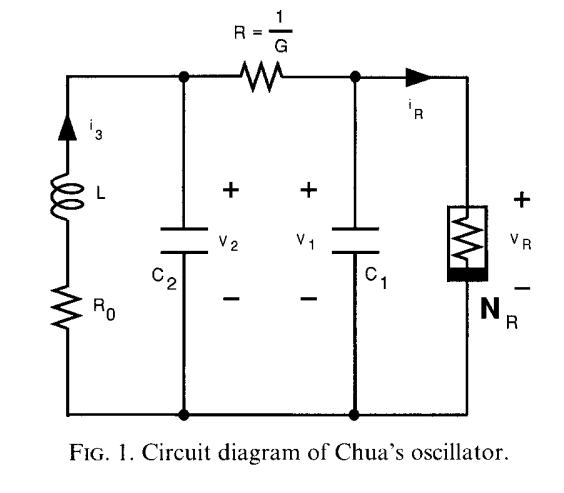

In [ ]:
#@title
from IPython.display import Image
Image('Chua.png', width=500)

Este circuito está descrito por las ecuaciones:

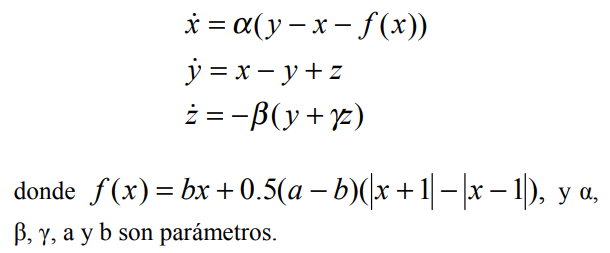

In [ ]:
#@title
Image('Chua_eq.png', width=500)

## Primera implementación, prueba del modelo real vs simulación

Basado en el circuito y las ecuaciones mostradas, en el documento publicado por la Universidad Tecnológica de Pereira, buscaron recrear el circuito en físico partiendo desde la implentación del diodo Chua y el diseño de todo el montaje, hasta llegar a obtener el resultado de simulación que ellos plantean y que se ve la siguiente manera:

In [ ]:
#Creación de las funciones f(x) , dx, dy, dz
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def fx(x,a,b):
  return b*x + (1/2)*(a-b)*(np.abs(x+1)-np.abs(x-1))  #Ecuación de f(x)

def chua_osc(t,y,alpha,beta,gamma,k,a,b):
   return [k*alpha*(y[1]-y[0]-fx(y[0],a,b)), k*(y[0]-y[1]+y[2]) , k*(-beta*y[1]-gamma*y[2]) ]  #Cada uno de los ejes, utilizando las ecuaciones planteadas

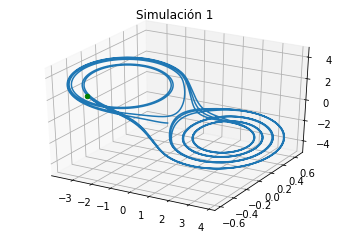

In [ ]:
#Entrada de parámetros utilizados en el documento
alpha=10
beta=10
gamma=0.5
a=-1.22
b=-0.734
k=1

#Tiempo de simulación
ti,tf=0,50

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0,-0.125,-0.646]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 1')
plt.show()

A partir de este resultado de simulación podemos decir que la implementación de las ecuaciones en Python se realizó de forma exitosa, puesto que el resultado mostrado en el documento es similar al obtenido

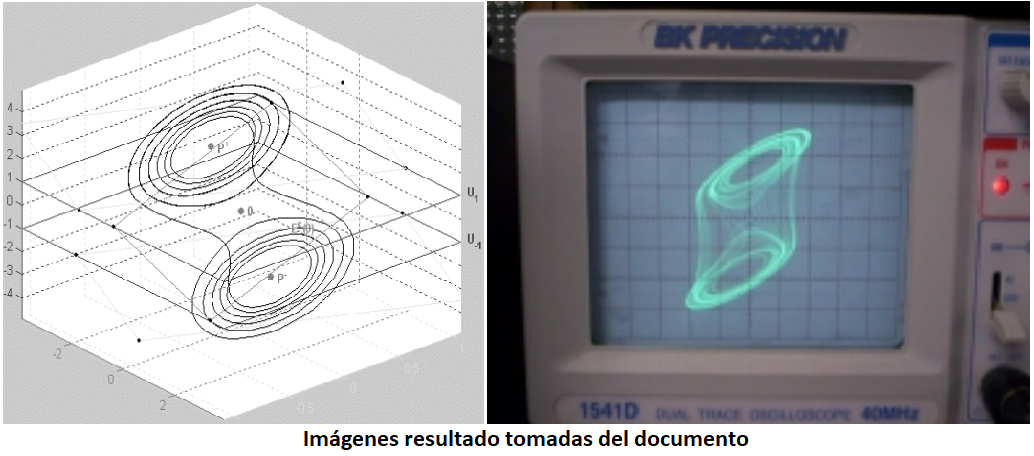

In [ ]:
#@title
Image('Chua_result_1.png', width=500)

## Segunda implementación, pruebas teóricas

Ahora que se ha realizado una prueba éxitosa de implementación del oscilador Chua basada en el segundo documento, se procederá a intentar replicar los resultados de algunos numerales del primer documento, haciendo un desarrollo teórico superficial de los fenómenos dinámicos, especialmente atractores caóticos, que se pueden generar con el oscilador Chua.


## 1. "Gallery of attractors"

En el documento esta sección muestra la inmensa variedad de formas que pueden los atractores, sin embargo, en este proyecto final se simularon un par de ellos.

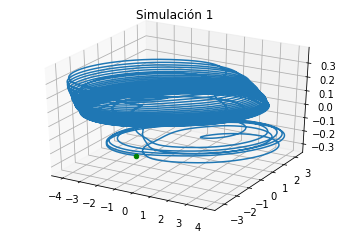

In [ ]:
#Primera figura (2.1 en el documento)
alpha=-1.301814
beta=-0.0136073
gamma=-0.02969968
a=0.1690817
b=-0.4767822
k=1

#Tiempo de simulación
ti,tf=0,500

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0.012,0,-0.042]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 2, figura 2.22')
plt.show()

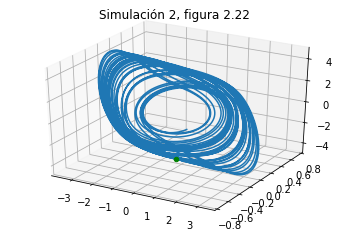

In [ ]:
#Segunda figura (2.22 en el documento)
#Primera figura (2.1 en el documento)
alpha=8.45622118418
beta=12.0732335925
gamma=0.0051631393
a=-0.7056296732
b=-1.1467573476
k=1

#Tiempo de simulación
ti,tf=0,100

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0.252,0,-1.451]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 2, figura 2.22')
plt.show()

## 2. "Period-adding bifurcations"
En esta sección del documento se explica que el fenómeno de bifurcación al añadir periodos, las ventanas de periodos consecutivos están separados por regiones de caos. Es decir, cuando el parámetro es variado, se obtiene una orbita estable de periodo n (con n =1,2,...) seguida de una región de caos, después una orbita de periodo estable -(n+1), seguida de caos, y después una orbita de periodo -(n+2) y así consecutivamente.


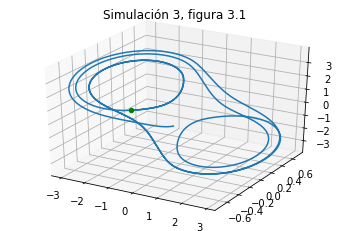

In [ ]:
#Tercera figura (3.1 en el documento)
alpha=3.70782609
beta=3.79752551
gamma=0.08015844
a=-1.285098
b=-0.6029288
k=1

#Tiempo de simulación
ti,tf=0,30

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0,-0.125,-0.646]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 3, figura 3.1')
plt.show()

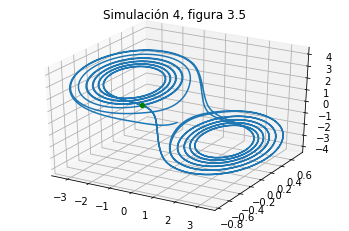

In [ ]:
#Cuarta figura (3.5 en el documento)
alpha=3.70782609
beta=4.13728103
gamma=0.08366743
a=-1.341354
b=-0.6293224
k=1

#Tiempo de simulación
ti,tf=0,100

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0,-0.055,-0.77]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 4, figura 3.5')
plt.show()

## 3. "Homoclinic and heteroclinic orbits in Chua’s oscillator"
Muy similar a la aparición de un comportamiento caótico in sistemas dinámicos están las llamadas trayectorias "Homoclínicas" y "Heteroclínicas". Una trayectoria homoclínica es aquella cuyo punto límite hacia adelante y hacía atraás, es el mismo punto de equilibrio de una silla de montar. Por otra parte, dos puntos de equilibrio diferentes son los puntos límites en el tiempo hacía adelante y hacia atrás, respectivamente, de una trayectoria heteroclínica. En el documento se plantean los siguientes ejemplos para ilustrarlas:


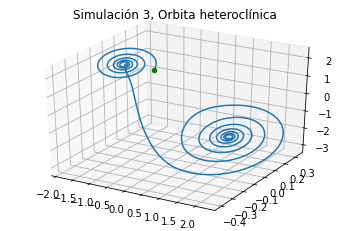

In [ ]:
#Quinta figura, Orbita heteroclínica (4 en el documento)
alpha=8.29203
beta=12.061126
gamma=0
a=-1.1428571
b=-0.7142857
k=1

#Tiempo de simulación
ti,tf=0,30

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[1.519009798388814 ,-0.004298524877956949, -1.567578825979665]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 5, Orbita heteroclínica')
plt.show()

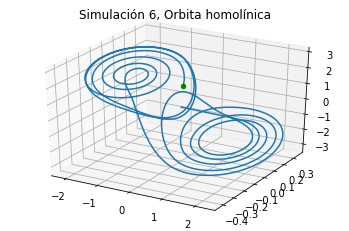

In [ ]:
#Sexta figura, Orbita homoclínica (4 en el documento)
alpha=8.29203
beta=12.061126
gamma=0
a=-1.1428571
b=-0.7142857
k=1

#Tiempo de simulación
ti,tf=0,30

t= np.linspace(ti,tf,10000)

#Condiciones iniciales
y0=[0.00083672759 ,0.000095112528, -0.00053929635 ]

#Solución de la ecuación
sol=solve_ivp(chua_osc,[ti,tf],y0,args=(alpha,beta,gamma,k,a,b),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.scatter3D(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1],'o',color='green')

plt.title('Simulación 6, Orbita homolínica')
plt.show()

## Finalmente...

El documento presenta muchos tipos más de fenómenos dinámicos, como los fenómenos de coexistencia, la intermitencia caos-caos o la resonancia estocastica del circuito Chua. Sin embargo, considero que con el fin de ilustrar la capacidad básica del Oscilador Chua y a modo de proyecto final, los tres modelos expuestos cuyo resultado concuerda con los obtenidos en el documento, son suficientes. 

Cada una de las simulaciones se pudo llevar a cabo con éxito (tras ajustar los parámatros y un par de intentos ajustando los tiempos de simulación), por lo que la implementación fue adecuada.


## Conclusiones

-Se pudo apreciar (gracias al segundo documento) que se pueden llevar a cabo montajes experimentales del oscilador Chua que permiten comprobar toda la teoría y simulación que existe detrás del modelo.

-Se ha comprobado que el Oscilador Chua es bastante sensible a los cambios sutiles en sus parámetros, especialmente el parámetro "Alfa", el cual hace que el sistema pierda su punto de equilibrio facilmente.

-Se pudo observar que los atractores caóticos son extremadamente sensibles a las condiciones iniciales, puesto que pueden alterar la convergencia del sistema.